In [ ]:
# installing the Kaggle library
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 99% 803M/812M [00:10<00:00, 89.3MB/s]
100% 812M/812M [00:10<00:00, 82.4MB/s]


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [ ]:
Names = os.listdir('/content/train/')
print(Names)

['cat.3503.jpg', 'dog.9280.jpg', 'dog.11626.jpg', 'dog.7039.jpg', 'dog.10158.jpg', 'dog.416.jpg', 'cat.1429.jpg', 'dog.3123.jpg', 'cat.6856.jpg', 'dog.9845.jpg', 'cat.6777.jpg', 'dog.1563.jpg', 'dog.4640.jpg', 'dog.10209.jpg', 'cat.1555.jpg', 'dog.4473.jpg', 'dog.12057.jpg', 'cat.3951.jpg', 'dog.250.jpg', 'dog.1009.jpg', 'dog.6710.jpg', 'dog.4883.jpg', 'dog.3558.jpg', 'cat.8096.jpg', 'dog.11208.jpg', 'cat.174.jpg', 'cat.12258.jpg', 'cat.3408.jpg', 'cat.5334.jpg', 'cat.4472.jpg', 'cat.621.jpg', 'cat.3360.jpg', 'cat.5677.jpg', 'dog.7763.jpg', 'dog.340.jpg', 'cat.10742.jpg', 'cat.8717.jpg', 'dog.310.jpg', 'dog.4044.jpg', 'cat.9249.jpg', 'cat.2095.jpg', 'cat.1296.jpg', 'cat.5755.jpg', 'dog.2092.jpg', 'dog.9164.jpg', 'cat.3928.jpg', 'cat.2839.jpg', 'dog.7485.jpg', 'dog.8387.jpg', 'dog.11493.jpg', 'cat.9454.jpg', 'cat.1612.jpg', 'dog.11547.jpg', 'dog.10920.jpg', 'cat.693.jpg', 'dog.285.jpg', 'cat.4976.jpg', 'dog.1468.jpg', 'dog.11794.jpg', 'cat.5856.jpg', 'dog.11450.jpg', 'dog.6188.jpg', 'ca

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

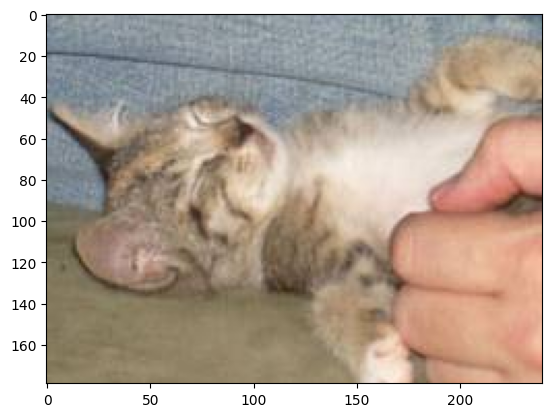

In [ ]:
img  = mpimg.imread('/content/train/cat.3503.jpg')
plt.imshow(img)

In [ ]:
#creating a directory for resized images
os.mkdir('/content/New_img_folder')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/New_img_folder/'

for i in range(2500):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

**Assiging Label**


Cat --> 0


Dog --> 1

In [ ]:
FileName = os.listdir('/content/New_img_folder')

labels = []

for i in range(2500):

  file_name = FileName[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(FileName[0:10])

['cat.3503.jpg', 'dog.9280.jpg', 'dog.11626.jpg', 'dog.7039.jpg', 'dog.10158.jpg', 'dog.416.jpg', 'cat.1429.jpg', 'dog.3123.jpg', 'cat.6856.jpg', 'dog.9845.jpg']


In [ ]:
print(labels[0:10])
print(len(labels))

[0, 1, 1, 1, 1, 1, 0, 1, 0, 1]
2500


In [ ]:
val, cnt = np.unique(labels, return_counts=True)
print(val)
print(cnt)

[0 1]
[1248 1252]


In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/New_img_folder/'
image_extension = ['jpg']

images = []

[images.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(img) for img in images])
print(dog_cat_images)

[[[[138 129 120]
   [135 126 117]
   [146 139 130]
   ...
   [128 101  87]
   [132 106  90]
   [137 111  95]]

  [[154 145 136]
   [150 141 132]
   [157 150 141]
   ...
   [135 112  96]
   [137 112  96]
   [135 112  96]]

  [[164 155 146]
   [158 149 140]
   [163 154 145]
   ...
   [141 125 108]
   [139 121 104]
   [131 116  97]]

  ...

  [[ 97 127 138]
   [ 97 127 138]
   [ 98 128 139]
   ...
   [143 170 221]
   [143 169 223]
   [142 168 222]]

  [[ 94 124 135]
   [ 95 125 136]
   [ 98 128 139]
   ...
   [145 172 223]
   [144 171 222]
   [144 171 222]]

  [[ 92 122 133]
   [ 95 125 136]
   [ 98 128 139]
   ...
   [146 173 224]
   [145 172 223]
   [145 172 223]]]


 [[[163 135 128]
   [145 117 110]
   [145 116 111]
   ...
   [ 77 101 119]
   [ 84 108 126]
   [ 88 112 130]]

  [[165 137 130]
   [151 123 116]
   [155 126 121]
   ...
   [ 77 101 119]
   [ 81 105 123]
   [ 84 108 126]]

  [[169 142 132]
   [157 130 120]
   [159 131 124]
   ...
   [ 76 102 119]
   [ 78 104 121]
   [ 79 105

In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2)
print(X_train.shape, X_test.shape)

(1875, 224, 224, 3) (625, 224, 224, 3)


In [ ]:
# scaling the data
Scaled_X_train = X_train/255

Scaled_X_test = X_test/255

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

model2 = hub.KerasLayer(model, input_shape=(224,224,3), trainable=False)

In [ ]:
total_classes = 2

model1 = tf.keras.Sequential([

    model2,
    tf.keras.layers.Dense(total_classes)

])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model1.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model1.fit(Scaled_X_train, Y_train, epochs=5)

Epoch 1/5
59/59 [==============================] - 78s 1s/step - loss: 0.2118 - acc: 0.9029
Epoch 2/5
59/59 [==============================] - 68s 1s/step - loss: 0.0637 - acc: 0.9797
Epoch 3/5
59/59 [==============================] - 80s 1s/step - loss: 0.0514 - acc: 0.9824
Epoch 4/5
59/59 [==============================] - 80s 1s/step - loss: 0.0394 - acc: 0.9888
Epoch 5/5
59/59 [==============================] - 68s 1s/step - loss: 0.0293 - acc: 0.9920


In [ ]:
score, acc = model1.evaluate(Scaled_X_test, Y_test)

print('Test Accuracy =', acc)

20/20 [==============================] - 22s 1s/step - loss: 0.0479 - acc: 0.9808
Test Accuracy = 0.9807999730110168


Enter the Path of the image to be predicted: /content/cat.jpg


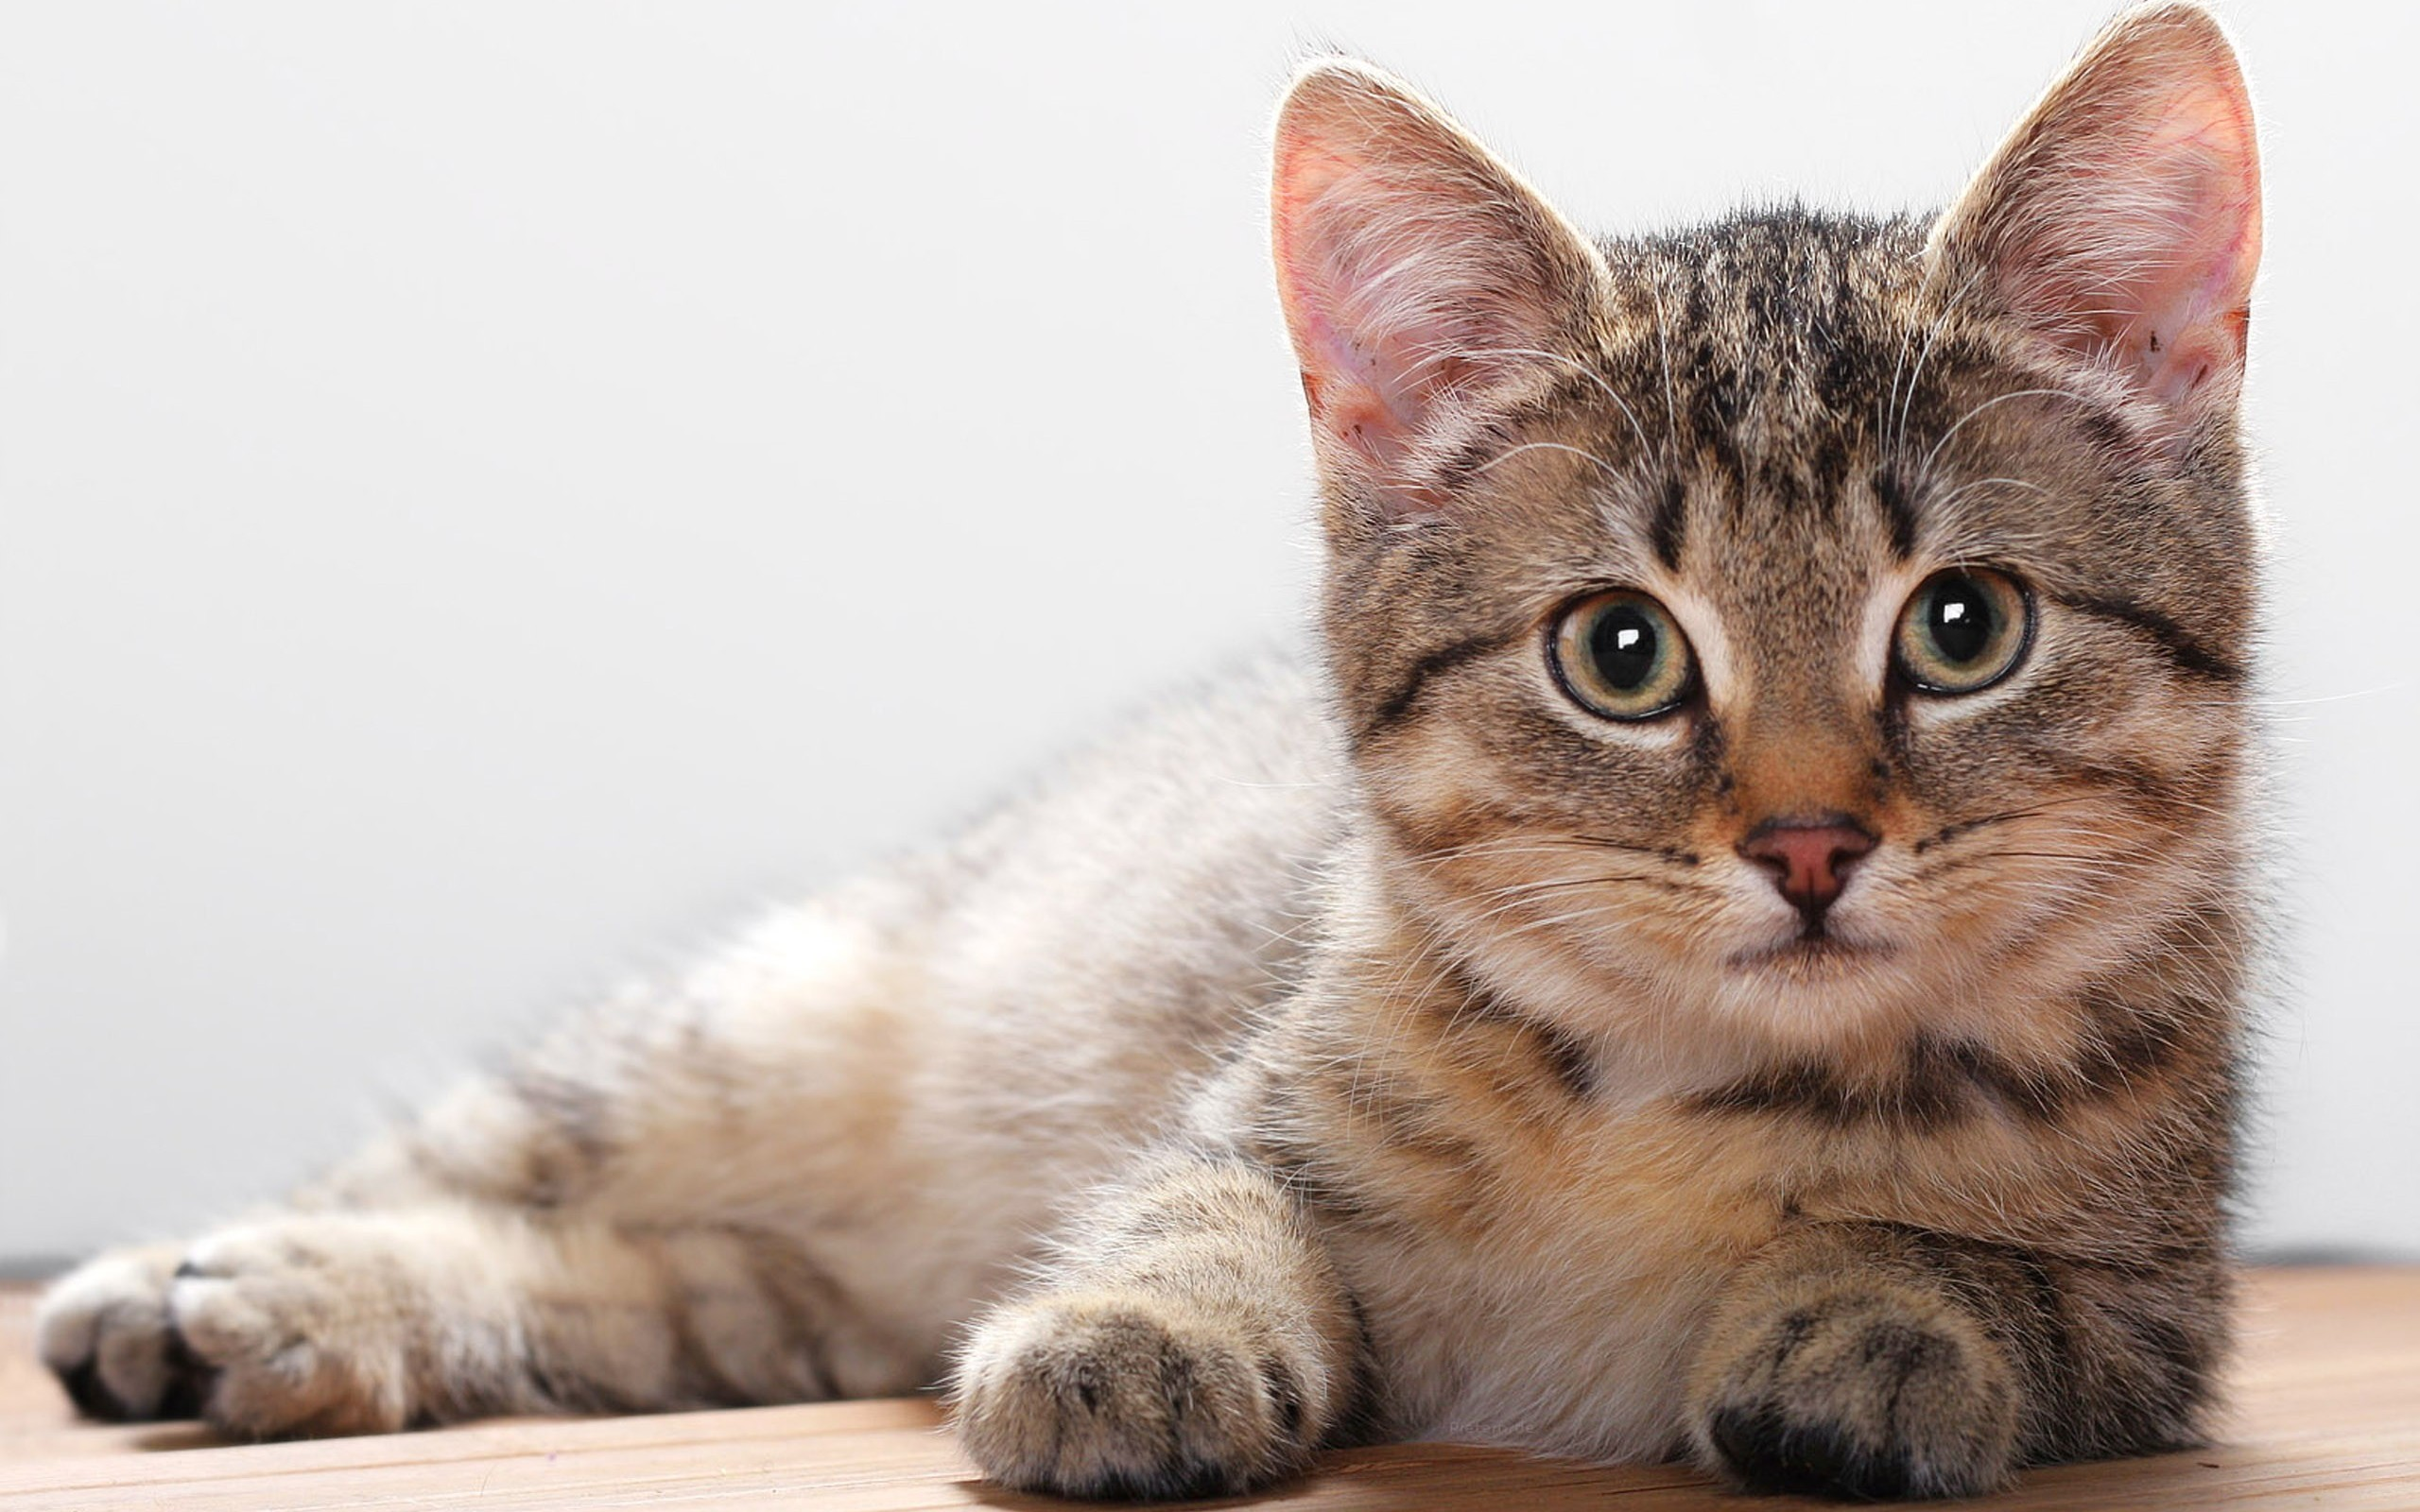

1/1 [==============================] - 1s 1s/step
[[ 2.599063  -3.7003777]]
0
This is a image of a Cat


In [ ]:
input_image_path = input('Enter the Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model1.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('This is a image of a Cat')

else:
  print('This is a image of a Dog')

Enter the Path of the image to be predicted: /content/Dog2.jpg


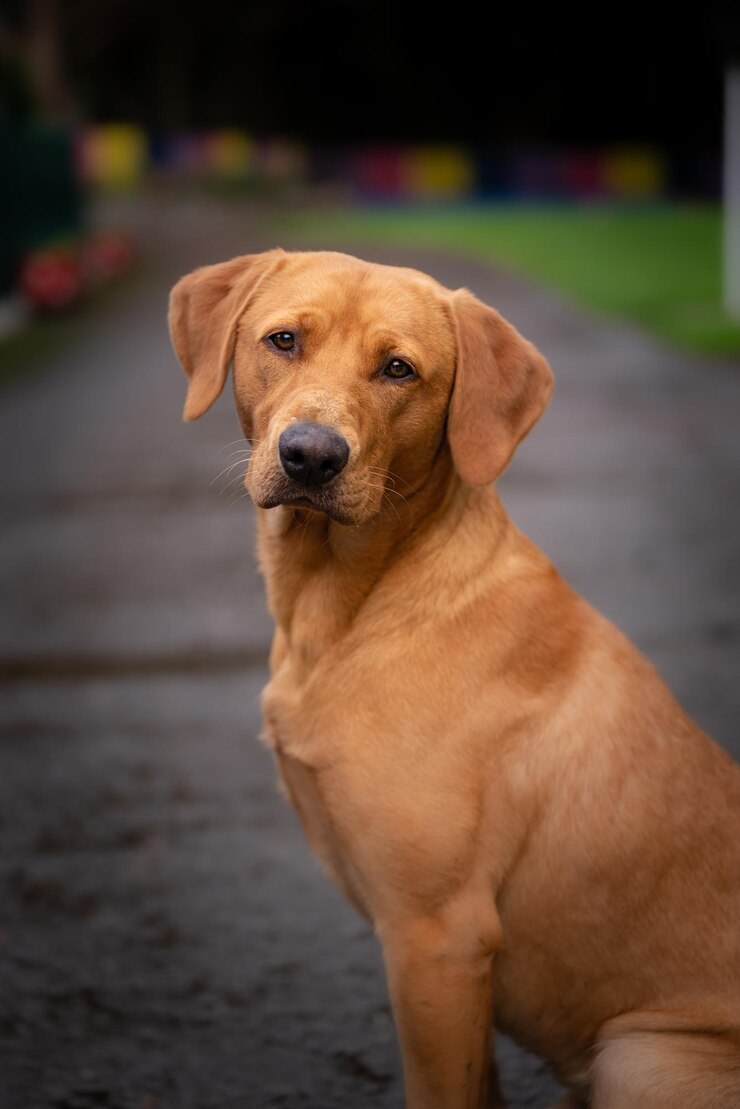

1/1 [==============================] - 0s 88ms/step
[[-3.9085846  4.1671586]]
1
This is a image of a Dog


In [ ]:
input_image_path = input('Enter the Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model1.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('This is a image of a Cat')

else:
  print('This is a image of a Dog')